###### Here, the basics of model development (SLR) anlysis have been performed.

In [1]:
# Importing dependencies

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Loading Data

In [2]:
df = pd.read_csv("automobileEDA.csv")
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
df.shape

(201, 29)

## Linear Regression

Simple Linear Regression is a method to help us understand the relationship between two variables:

    The predictor/independent variable (X)
    The response/dependent variable (that we want to predict)(Y)


                                      Linear function:      𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋

In [4]:
# Importing required library

from sklearn.linear_model import LinearRegression

In [5]:
# Creating a linear regression object

lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
# Creating a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.

X = df[['highway-mpg']]
Y = df['price']

In [7]:
# Fitting the values in the object

lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# Final Output of a prediction (using above formula)

Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [9]:
# For intercept 

lm.intercept_

38423.3058581574

In [10]:
# For coefficient

lm.coef_

array([-821.73337832])

Plugging in the actual values it comes as:

price = 38423.31 - 821.73 x highway-mpg


#### Similarly,

In [11]:
lm1 = LinearRegression()
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
X1 = df[['engine-size']]
Y1 = df[['price']]
lm1.fit(X1,Y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
lm1.coef_

array([[166.86001569]])

In [14]:
lm1.intercept_

array([-7963.33890628])

In [15]:
y_hat1 = lm1.predict(X1)
y_hat1[0:5]

array([[13728.4631336 ],
       [13728.4631336 ],
       [17399.38347881],
       [10224.40280408],
       [14729.62322775]])

## Visualiztion in LR

In [16]:
import seaborn as sns

(0, 48265.66895529205)

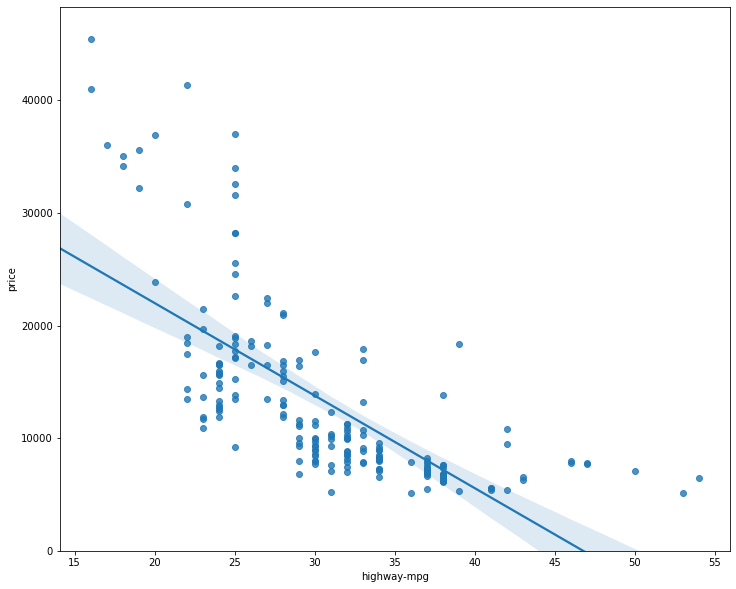

In [17]:
# For selecting the perimeters 

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)        # Here, "HIGHWAY-MPG"
plt.ylim(0,)

(0, 47422.919330307624)

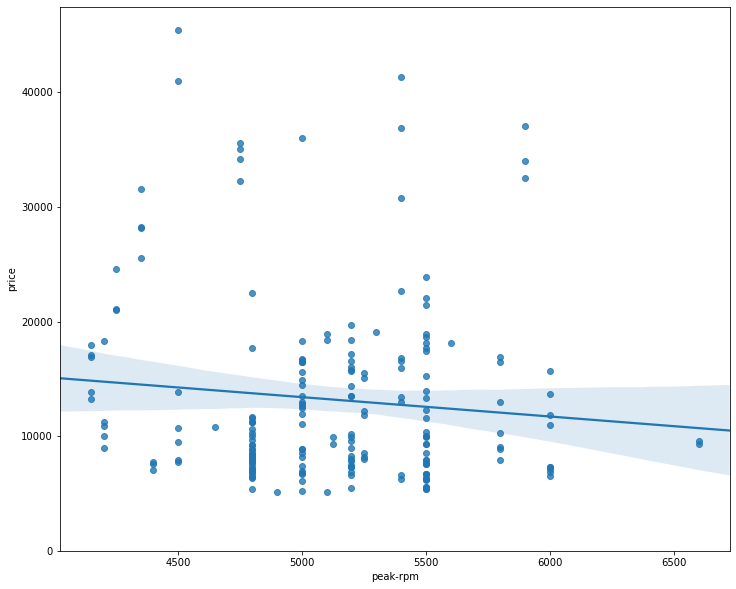

In [18]:
# "PEAK-RPM"

plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

### Residual Plot

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

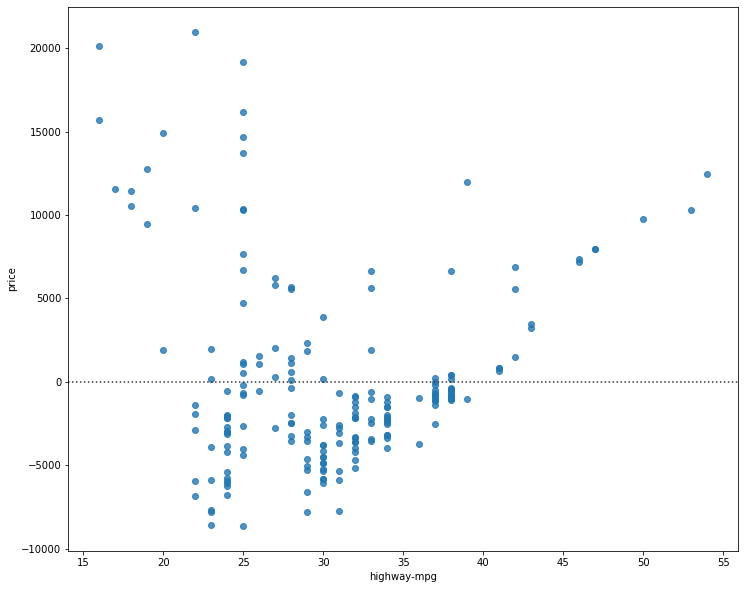

In [19]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.

## In-Sample Evaluation in LR

When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

    R^2 / R-squared
    Mean Squared Error (MSE)


R-squared

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

Mean Squared Error (MSE)

The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).

In [20]:
# R^2 error

lm.fit(X, Y)
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


The variation of the price is explained by this simple linear model "highway_mpg
".

In [21]:
# For getting the value of y_hat

Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
# Mean-square error

mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


## Prediction and Decision Making

In [29]:
# Creating new input

new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [26]:
# Fitting the model 

lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
# Prediction

yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

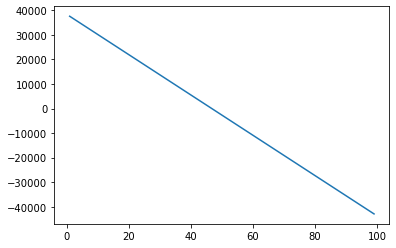

In [28]:
# Visualization

plt.plot(new_input, yhat)
plt.show()


What is a good R-squared value? When comparing models, the model with the higher R-squared value is a better fit for the data.

What is a good MSE? When comparing models, the model with the smallest MSE value is a better fit for the data.

Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.

    R-squared: 0.49659118843391759
    MSE: 3.16 x10^7
